In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ("../data/traffic_data.csv")
print(df)

    track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time
0    1; Car; 48.85; 9.770344; 37.977391; 23.737688;...                            
1    2; Motorcycle; 98.09; 19.839417; 37.977642; 23...                            
2    3; Motorcycle; 63.80; 18.228752; 37.977997; 23...                            
3    4; Motorcycle; 145.72; 26.229014; 37.978135; 2...                            
4    5; Motorcycle; 138.01; 24.841425; 37.978134; 2...                            
..                                                 ...                            
917  918; Car; 78.83; 30.846243; 37.980629; 23.7350...                            
918  919; Motorcycle; 19.50; 9.234518; 37.979327; 2...                            
919  920; Car; 48.97; 24.486209; 37.978413; 23.7355...                            
920  921; Motorcycle; 46.68; 30.007124; 37.980020; ...                            
921  922; Car; 35.00; 23.335533; 37.978428; 23.7355...                            

[92

In [3]:
df.head(5)

,track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time
0,1; Car; 48.85; 9.770344; 37.977391; 23.737688;...
1,2; Motorcycle; 98.09; 19.839417; 37.977642; 23...
2,3; Motorcycle; 63.80; 18.228752; 37.977997; 23...
3,4; Motorcycle; 145.72; 26.229014; 37.978135; 2...
4,5; Motorcycle; 138.01; 24.841425; 37.978134; 2...


In [4]:
import re
import pandas as pd
from io import StringIO

with open("../data/traffic_data.csv", "r", encoding='utf-8') as file:
    raw_data = file.read()
    
# convert txt to valid csv (comma separated values) format
raw_data = raw_data.replace(' - ', '-')
raw_data = raw_data.replace('Date InformationIdNo.', 'Date","Information","IdNo.')
raw_data = raw_data.replace('" Cr."', '"Cr","Information_add"')
raw_data = re.sub('(\d{2} [A-Z]{3} \d{2})', r'\1","', raw_data)
raw_data = re.sub('\n"([A-Z0-9-]+)","","",""\n', r',"\1"\n', raw_data)
raw_data = re.sub(r',""{2,}', '', raw_data)
raw_data = re.sub('([A-Z0-9]{3,}",")', r'","\1","', raw_data)
raw_data = re.sub(',""+', r'', raw_data)
raw_data = re.sub('\n""+', r'', raw_data)

# # create dataframe and replace NaN with ""
df = pd.read_csv(StringIO(raw_data), sep=",")
df.fillna("", inplace=True)

# merge columns and drop temporary column
# df['Information'] = df['Information'] + df['Information_add']
# df.drop(['Information_add'], axis=1, inplace=True)

# cleanup column headers
df.columns = [name.strip() for name in df.columns]

# convert date to datetime format
# df['Date'] = pd.to_datetime(df['Date'].str.title().str.strip(), format="%d %b %y", dayfirst=True)
# df['Date out'] = pd.to_datetime(df['Date out'].str.title().str.strip(), format="%d %b %y", dayfirst=True)

df

,track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time
0,1; Car; 48.85; 9.770344; 37.977391; 23.737688;...
1,2; Motorcycle; 98.09; 19.839417; 37.977642; 23...
2,3; Motorcycle; 63.80; 18.228752; 37.977997; 23...
3,4; Motorcycle; 145.72; 26.229014; 37.978135; 2...
4,5; Motorcycle; 138.01; 24.841425; 37.978134; 2...
...,...
917,918; Car; 78.83; 30.846243; 37.980629; 23.7350...
918,919; Motorcycle; 19.50; 9.234518; 37.979327; 2...
919,920; Car; 48.97; 24.486209; 37.978413; 23.7355...
920,921; Motorcycle; 46.68; 30.007124; 37.980020; ...


In [5]:
df_col = pd.read_csv("../data/traffic_data.csv",sep="[,;:]",index_col=False,)

/tmp/ipykernel_12384/2612214601.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_col = pd.read_csv("../data/traffic_data.csv",sep="[,;:]",index_col=False,)
/tmp/ipykernel_12384/2612214601.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_col = pd.read_csv("../data/traffic_data.csv",sep="[,;:]",index_col=False,)


In [6]:
df_col.head()

,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time
0,1,Car,48.85,9.770344,37.977391,23.737688,4.9178,0.0518,-0.0299,0.0
1,2,Motorcycle,98.09,19.839417,37.977642,23.737400,16.9759,-0.0361,-0.0228,0.0
2,3,Motorcycle,63.80,18.228752,37.977997,23.737264,20.1906,-0.0795,-0.3395,0.0
3,4,Motorcycle,145.72,26.229014,37.978135,23.737072,2.7555,-0.0302,0.0948,0.0
4,5,Motorcycle,138.01,24.841425,37.978134,23.737103,0.0000,0.0000,0.0000,0.0


In [7]:
df_col.shape

(922, 10)

In [8]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   track_id     922 non-null    int64  
 1    type        922 non-null    object 
 2    traveled_d  922 non-null    float64
 3    avg_speed   922 non-null    float64
 4    lat         922 non-null    float64
 5    lon         922 non-null    float64
 6    speed       922 non-null    float64
 7    lon_acc     922 non-null    float64
 8    lat_acc     922 non-null    float64
 9    time        922 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 72.2+ KB


In [9]:
df_col.isna().sum()

track_id       0
 type          0
 traveled_d    0
 avg_speed     0
 lat           0
 lon           0
 speed         0
 lon_acc       0
 lat_acc       0
 time          0
dtype: int64

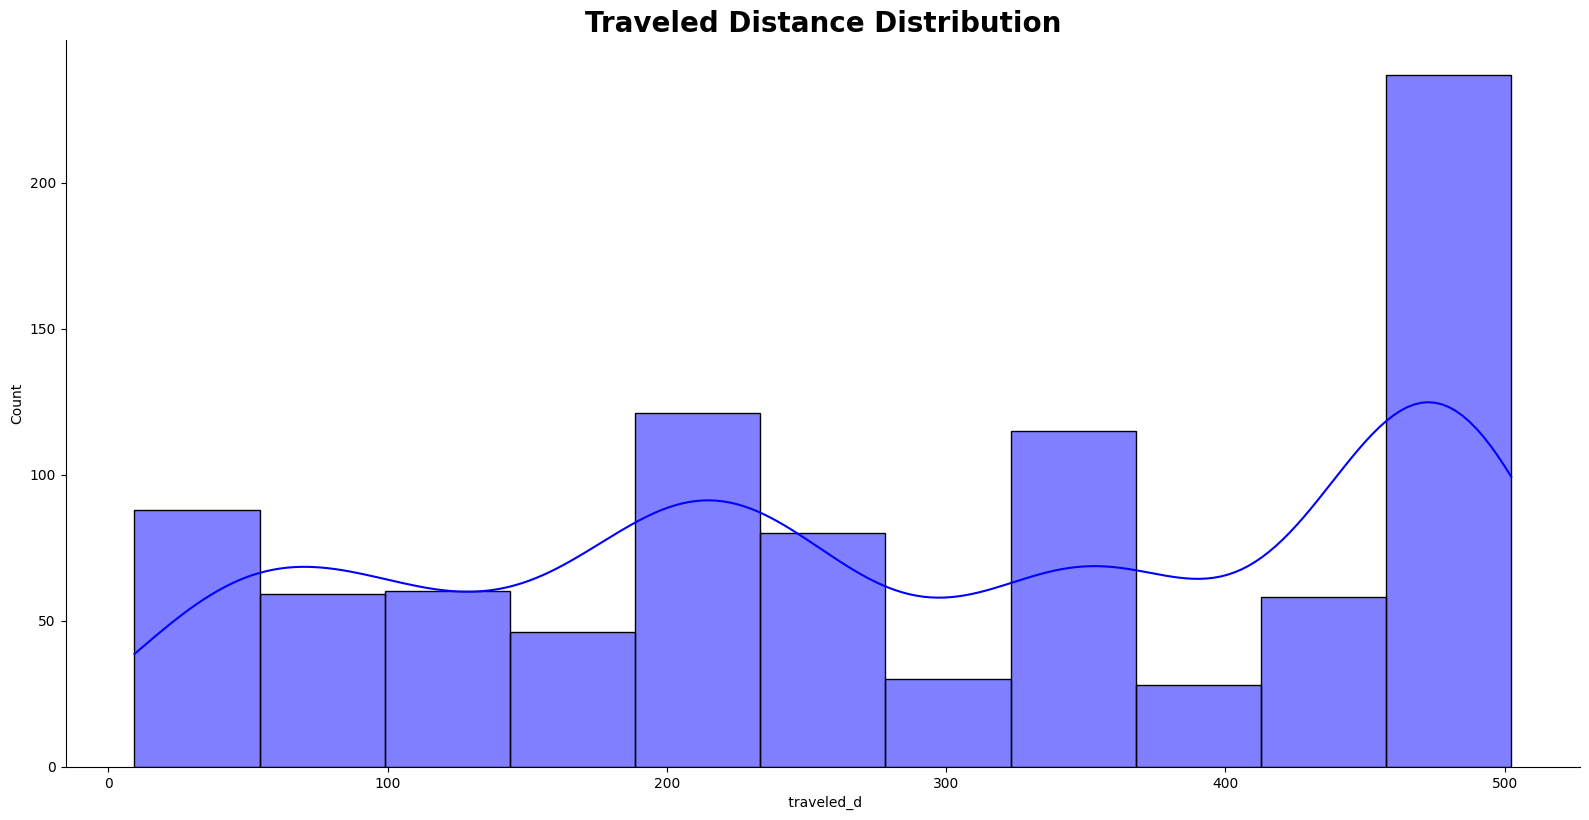

In [16]:
sns.displot(data=df_col, x=" traveled_d", color="blue", kde=True, height=8, aspect=2)
plt.title(f'Traveled Distance Distribution', size=20, fontweight='bold')
plt.show()

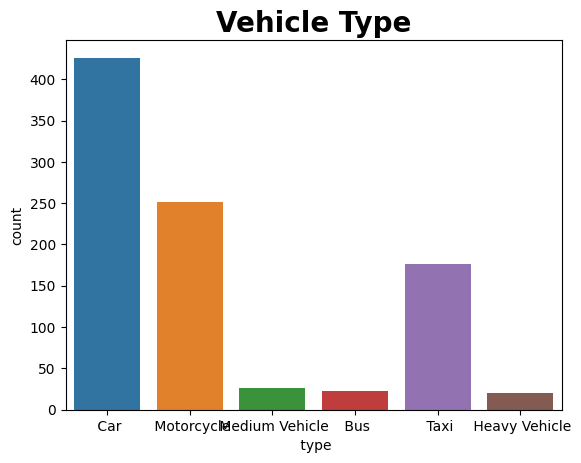

In [22]:
sns.countplot(data=df_col, x=" type")
plt.title(f'Vehicle Type', size=20, fontweight='bold')
plt.show()

In [23]:
df_col.to_csv(r'../data/traffic_data2.csv', index = True)